In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,author,publicationTime,bodyText
0,0,2.209799e+09,10/02/2016 10:30,RT @350Australia: Adani Group's Aust #coal min...
1,1,2.209799e+09,10/02/2016 10:36,RT @avivaimhof: Poor old #coal. Now even #Viet...
2,2,4.306011e+07,10/02/2016 10:37,RT @market_forces: Funds have burned billions ...
3,3,2.209799e+09,10/02/2016 10:37,RT @avivaimhof: #Vietnam PM Announces Retreat ...
4,4,5.855606e+08,10/02/2016 10:41,RT @350Australia: Adani Group's Aust #coal min...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Data columns (total 4 columns):
Unnamed: 0         13378 non-null object
author             13373 non-null float64
publicationTime    13373 non-null object
bodyText           13373 non-null object
dtypes: float64(1), object(3)
memory usage: 418.6+ KB


In [6]:
interval = input('Enter Interval in seconds : ') + 'S'

Enter Interval in seconds : 3600


In [7]:
df["publicationTime"] = pd.to_datetime(df["publicationTime"])
df['bodyText'].fillna('not found',inplace=True)


In [8]:
df1 = df.groupby(pd.Grouper(key='publicationTime', freq=interval)).size().reset_index(name='Count')
df1.head()

,publicationTime,Count
0,2016-01-03 04:00:00,1
1,2016-01-03 05:00:00,0
2,2016-01-03 06:00:00,2
3,2016-01-03 07:00:00,5
4,2016-01-03 08:00:00,5


In [9]:
df1 = df1[df1.Count != 0]

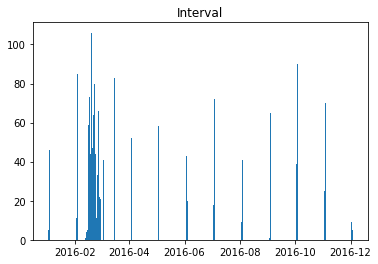

In [10]:
%matplotlib inline
plt.bar(df1['publicationTime'], df1['Count'], align='center')
plt.title('Interval')
plt.show()

In [11]:
def gen_window(df):
    window = []
    count = 1
    for i, row in df.iterrows():
        window.append("Window {}".format(count))
        count += 1
    return window


In [15]:
df1['window'] = gen_window(df1)
df1.to_csv('count_with_interval.csv')

In [16]:
df2 = df
df2['users'] = np.zeros((len(df2.index),), dtype=int)
df2.head()
for i, row in df2.iterrows():
    data = []
    for text in row['bodyText'].split(' '):
        if text.startswith('@'):
            data.append(text)
    df2.set_value(i, 'users', len(data))

C:\Users\ansja001\AppData\Local\Continuum\anaconda31\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [14]:
df2 = df2.groupby(pd.Grouper(key='publicationTime', freq=interval))['publicationTime','users'].sum()
df2 = df3[np.isfinite(df2['users'])]
df2['windows'] = gen_window(df2)
df2.head()
df2.to_csv('count_with_users.csv')

NameError: name 'df3' is not defined

In [ ]:
df3 = df
df3['retweet'] = np.zeros((len(df.index),), dtype=int)
df3.head()
for i, row in df3.iterrows():
    for index, text in enumerate(row['bodyText'].split(' ')):
        if index == 0 and text == 'RT':
            df3.set_value(i, 'retweet', 1)
df3.head()

In [ ]:
df3 = df3.groupby(pd.Grouper(key='publicationTime', freq=interval))['publicationTime','retweet'].sum()
df3 = df3[np.isfinite(df3['retweet'])]
df3['windows'] = gen_window(df3)
df3.head()
df3.to_csv('count_with_retweets.csv')